<a href="https://colab.research.google.com/github/aj4di/nlp/blob/main/Copy_of_Copy_of_project_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project


## **Context:**


Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 

## **Data Description:**

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

## **Dataset:**

The dataset has the following columns:

    tweet_id                                                           
    airline_sentiment                                               
    airline_sentiment_confidence                               
    negativereason                                                   
    negativereason_confidence                                    
    airline                                                                    
    airline_sentiment_gold                                              
    name     
    negativereason_gold 
    retweet_count
    text
    tweet_coord
    tweet_created
    tweet_location 
    user_timezone

 

## **Objective:**

To implement the techniques learned as a part of the course.


## **Learning Outcomes:**

    1) Basic understanding of text pre-processing.
    2) What to do after text pre-processing
    3) Bag of words
    4) Tf-idf
    5) Build the classification model.
    6) Evaluate the Model

 

 



#### The purpose of this analysis is to explore the numerous features and build a classification model where we will be able to tag the rating based on the description and consequently rate them as positive or negative. In this analysis, we will be focusing on score, summary, description and score based sentiment features.



##**Steps:**
- Import the necessary libraries
- Get the data
- Explore the data
- Do feature engineering (create relevant columns based on existing columns)
- Plot the wordcloud based on the relevant column
- Do pre-processing
- Noise removal (Special character, html tags, numbers, 
stopword removal)
- Lowercasing
- Stemming / lemmatization
- Text to number: Vectorization
- CountVectorizer
- TfidfVectorizer
- Build Machine Learning Model for Text Classification.
- Optimize the parameter
- Plot the worldcloud based on the most important features
- Check the performance of the model
- Summary


In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 4.3 MB/s 
     |████████████████████████████████| 106 kB 53.5 MB/s 


In [ ]:
# install and import necessary libraries.

#!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Tweets.csv')

In [ ]:
data.shape                                               # print shape of data.

(14640, 15)

### The data set has 14640 rows and 15 columns.

In [ ]:
data.head()                                              # Print first 5 rows of data.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


The data sets has alot of 'NaN's 

In [ ]:
data.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

Number of unique inputs in columns. 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

### ***Understanding of data columns: conclusions before further preprocessing the data:***
### 1. Column 'tweet_id' is a column that has to be dropped
### 2. Column 'airline_sentiment_gold' contains only 3 unique values and 14600 null values hence I will drop the column. 

### 3. The same about column 'negativereason_gold'
### 4. Column tweet_created contains data and time and is not very useful.
### 5. The same about the 'tweet_coord' and 'tweet_location' - not useful and very specific.
### 6. There are 85 user_timezone values and 

In [ ]:
data.isnull().sum(axis=0)                                # Check for NULL values.

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

## **Exploratory data analysis**
Do Exploratory data analysis(EDA) based on the below statement. (6 Marks) a. Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets. b. Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons. c. Plot the word cloud graph of tweets for positive and negative sentiment separately. Mention the observations & insights after plotting each graph.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### plot the distribution of sentiment across all the tweets.

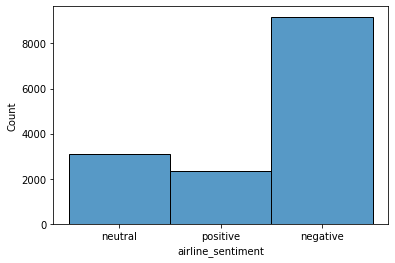

In [ ]:
sns.histplot(data=data, x="airline_sentiment", bins=5, palette="winter")

We see that majority of the tweets are negative.

It makes sense as usually people are more motivated to write on twitter negative comments and somemight consider positive comments as free advertising so ... . Abundance of advertisements and crypto advertisement, product placements etc. and presence of bots on twitter have caused that people do not behave the way they used to.


### Plot the distribution of all tweets among each airline

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot



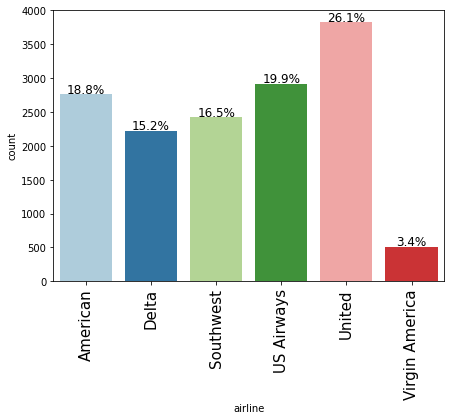

In [ ]:
labeled_barplot(data, "airline", perc=True)

Most of the tweets are about American (18.8%) US Airways (19.9%) and United (26.1%)

### Distributions of tweets sentiment for airlines 

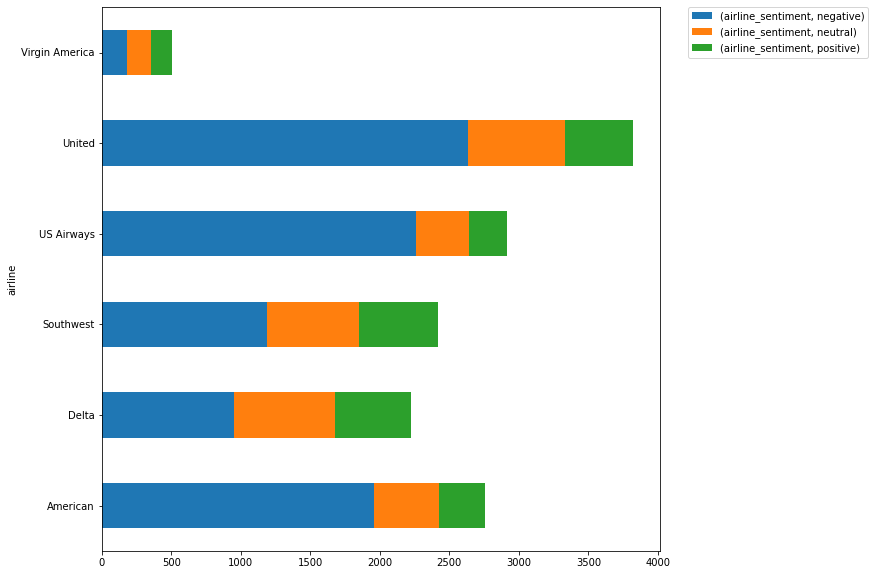

In [ ]:
pd.DataFrame(data.groupby('airline')['airline_sentiment'].value_counts()).unstack().plot.barh(figsize=(10,10),stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

### In more detaled the distributions of positive negative and neutral tweets for each of the airlines:

In [ ]:
VA = data[data["airline"] == "Virgin America"]

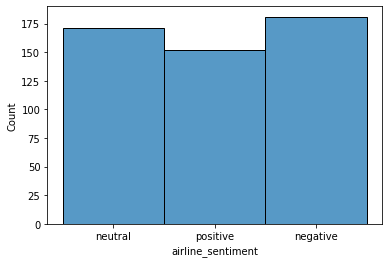

In [ ]:
sns.histplot(data=VA, x="airline_sentiment", bins=5, palette="winter")

For Virgin America there are similar number of positive negative and neutral tweets.

In [ ]:
A = data[data["airline"] == "American"]

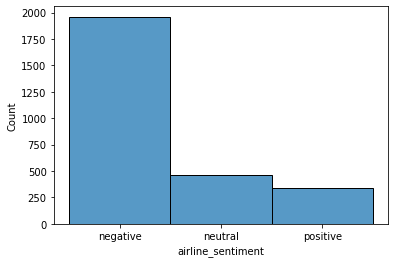

In [ ]:
sns.histplot(data=A, x="airline_sentiment", bins=5, palette="winter")

For American majority of tweets are negative (almost 2000).

In [ ]:
D = data[data["airline"] == "Delta"]

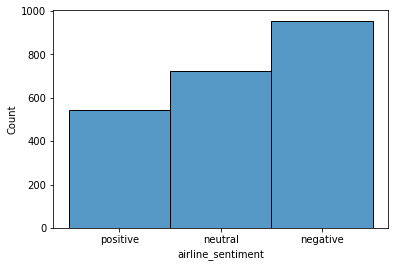

In [ ]:
sns.histplot(data=D, x="airline_sentiment", bins=5, palette="winter")

For Delta majorit of tweets are negative, but the difference between number of positive and neutral tweets is closer than for American.

In [ ]:
S = data[data["airline"] == "Southwest"]

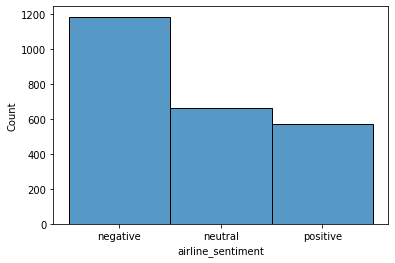

In [ ]:
sns.histplot(data=S, x="airline_sentiment", bins=5, palette="winter")

For Southwets again majority oftweets are negative and he difference between positive negative andneutral tweets is similar to Delta.

In [ ]:
U = data[data["airline"] == "United"]

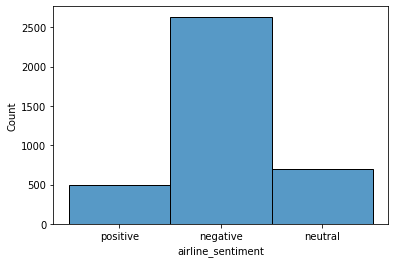

In [ ]:
sns.histplot(data=U, x="airline_sentiment", bins=5, palette="winter")

Sentiment distributon for tweets for United is similar to the one for American: strong dominaiton by negative tweets (difference approximately 2000).

In [ ]:
UA = data[data["airline"] == "US Airways"]

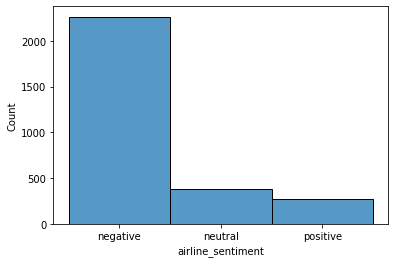

In [ ]:
sns.histplot(data=UA, x="airline_sentiment", bins=5, palette="winter")

Again strong majority (more than 2000) tweets negative.

### Plotting the distribution of the negative reason

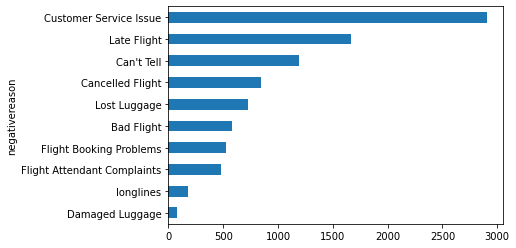

In [ ]:
data.groupby('negativereason')['negativereason'].count().sort_values(ascending=True).plot.barh()

The 3 most common reasons for negative tweet is customer service issue, late flight and 'can't tell'.

### Wordclouds

In [ ]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### ***Understanding of Data Columns***
Understand of data columns: 

a. Drop all other columns except “text” and “airline_sentiment”. 

b. Check the shape of the data. 

c. Print the first 5 rows of data.

In [ ]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
data2=data.drop(["tweet_id",'airline_sentiment_confidence','negativereason_confidence','airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count','tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone','negativereason', 'airline'], axis=1)

In [ ]:
data2.columns

Index(['airline_sentiment', 'text'], dtype='object')

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [ ]:
data2=data2.dropna()  #dropping missing values

In [ ]:
data2.info()                                     # Print the column of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 343.1+ KB


In [ ]:
data2

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


### ***Data Pre - Processing***

Text pre-processing: Data preparation. 

NOTE:- Each text pre-processing step should be mentioned in the notebook separately.
 a. Html tag removal.

b. Tokenization.

c. Remove the numbers.

d. Removal of Special Characters and Punctuations. 

e. Removal of stopwords 

f. Conversion to lowercase. 

g. Lemmatize or stemming. 

h. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.) 

i. Print the first 5 rows of data after pre-processing.

### **Text Pre-processing:**

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.

- Tokenization
- To remove Stopwords.
- Lemmatized data

We have used the **NLTK library to tokenize words, remove stopwords and lemmatize the remaining words**

### Please note - I did the same thing TWICE but I do not copy all of the functions. Once with dataframe tht contained the column 'negative reason'to do the wordcloud. 

2nd time I comment the 'negativereason' lines but I use it to do the figure. 

In [ ]:
dat=data2

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

dat['text'] = dat['text'].apply(lambda x: strip_html(x))
#dat['negativereason'] = dat['negativereason'].apply(lambda x: strip_html(x))

dat.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [ ]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

dat['text'] = dat['text'].apply(lambda x: replace_contractions(x))
#dat['negativereason'] = dat['negativereason'].apply(lambda x: replace_contractions(x))

dat.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


In [ ]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

dat['text'] = dat['text'].apply(lambda x: remove_numbers(x))
#dat['negativereason'] = dat['negativereason'].apply(lambda x: remove_numbers(x))

dat.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


In [ ]:
dat['text'] = dat.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
#dat['negativereason'] = dat.apply(lambda row: nltk.word_tokenize(row['negativereason']), axis=1) # Tokenization of data

In [ ]:
dat

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, com..."
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, is, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, is, a, really, big..."
...,...,...
14635,positive,"[@, AmericanAir, thank, you, we, got, on, a, d..."
14636,negative,"[@, AmericanAir, leaving, over, minutes, Late,..."
14637,neutral,"[@, AmericanAir, Please, bring, American, Airl..."
14638,negative,"[@, AmericanAir, you, have, my, money, ,, you,..."


In [ ]:
from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt      

In [ ]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))                              

In [ ]:
import unicodedata
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

dat['text'] = dat.apply(lambda row: normalize(row['text']), axis=1)
#dat['negativereason'] = dat.apply(lambda row: normalize(row['negativereason']), axis=1)


In [ ]:
dat

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience ...
2,neutral,virginamerica not today must mean need take an...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing
...,...,...
14635,positive,americanair thank get different flight chicago
14636,negative,americanair leave minutes late flight warn com...
14637,neutral,americanair please bring american airlines bla...
14638,negative,americanair money change flight not answer pho...


### **Word Cloud based on Summary and Score**

In [ ]:

dat['text'] = dat.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['text'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

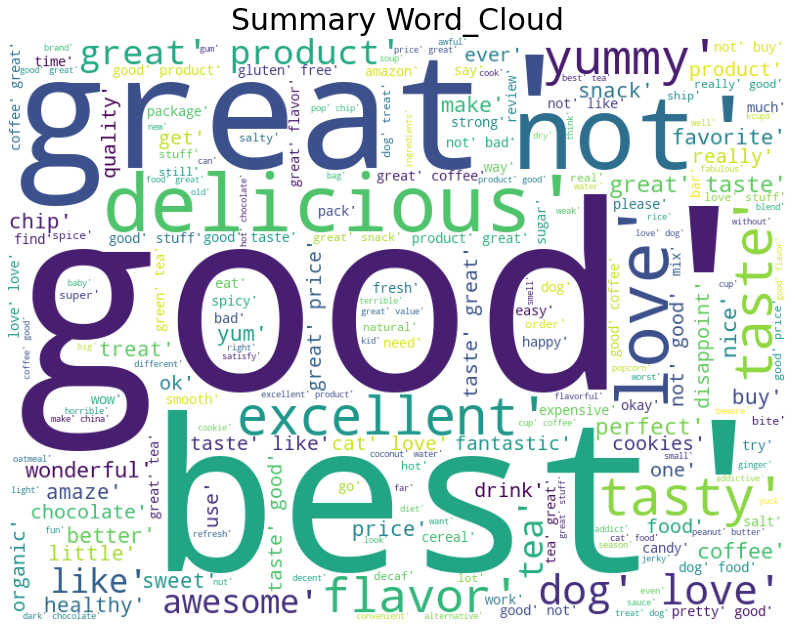

In [ ]:
show_wordcloud(data,'Summary Word_Cloud')


- Most of the word in the word summary column are positive sentiment in nature
- We can see the most frequent words choosen by consumers to express their sentiment for the products

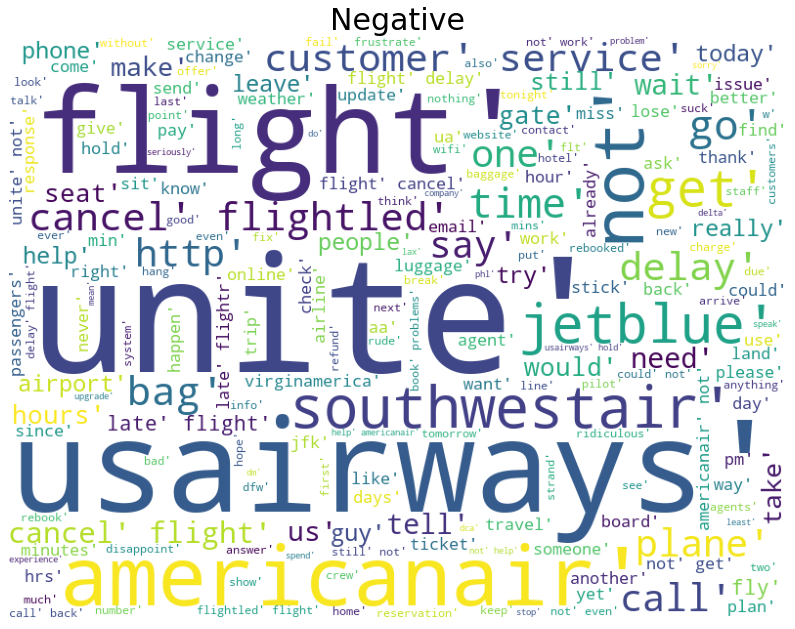

In [ ]:
show_wordcloud(dat[dat.airline_sentiment == 'negative'], title = "Negative")

- Consumers are complaining about taste,product & sharing their experience as horrible , disappoint etc.


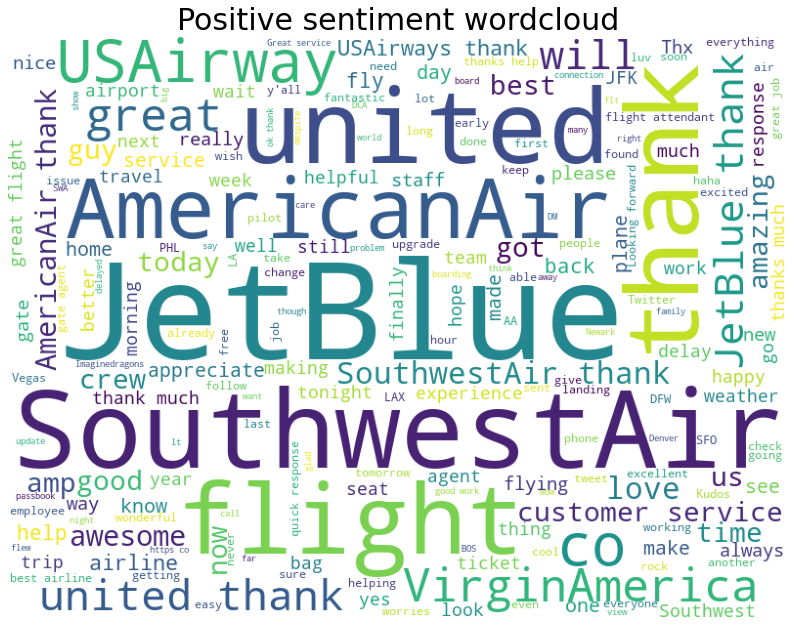

In [ ]:
show_wordcloud(data[data.airline_sentiment == 'positive'], title = "Positive sentiment wordcloud")

- We can see the different degree of sentiment words are used by consumers to express their emotions for high scored rated product.

### **Building the model based on CountVectorizer and Random Forest**

In [ ]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(dat['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [ ]:
dat

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience ...
2,neutral,virginamerica not today must mean need take an...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing
...,...,...
14635,positive,americanair thank get different flight chicago
14636,negative,americanair leave minutes late flight warn com...
14637,neutral,americanair please bring american airlines bla...
14638,negative,americanair money change flight not answer pho...


In [ ]:
data_features.shape

(14640, 2000)

In [ ]:
dat.airline_sentiment.nunique()

3

In [ ]:
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0
    
dat.airline_sentiment = dat.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [ ]:
labels = dat['airline_sentiment']
labels = labels.astype('int')

In [ ]:
labels

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [ ]:
labels.nunique()

3

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [ ]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7168032786885246


### **Optimizing the parameter: Number of trees in the random forest model(n_estimators)**

In [ ]:

# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [ ]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

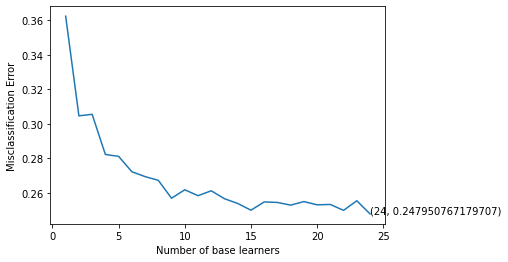

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7723132969034608

In [ ]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

[[2560  186   68]
 [ 391  423   70]
 [ 172  113  409]]
0.7723132969034608


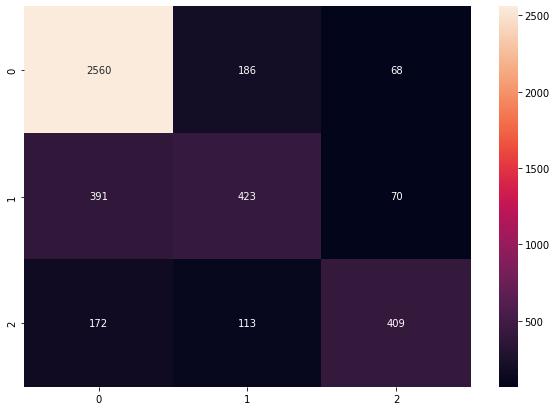

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### **Word Cloud of top 40 important features from the CountVectorizer + Random Forest based model**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


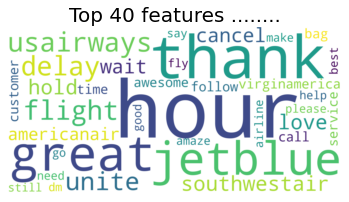

In [ ]:


all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features ........', fontsize=20)
plt.axis("off")
plt.show()

### **Term Frequency(TF) - Inverse Document Frequency(IDF)**

In [ ]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
data_features = vectorizer.fit_transform(dat['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 3000)

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [ ]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6933060109289617


In [ ]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

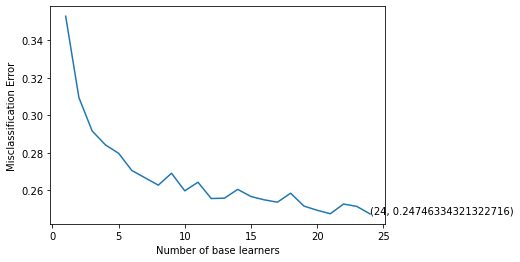

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.76775956284153

In [ ]:
result = clf.predict(X_test)

[[2654  119   41]
 [ 469  355   60]
 [ 246   85  363]]
0.76775956284153


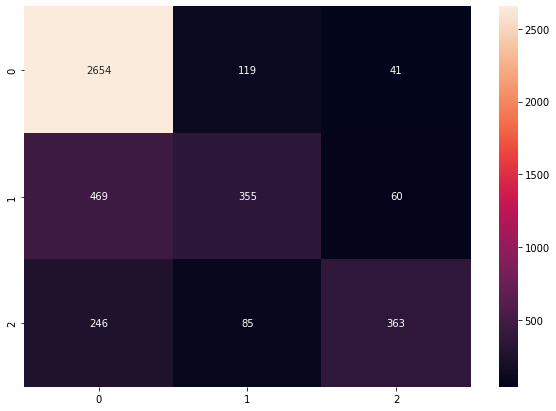

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  clf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


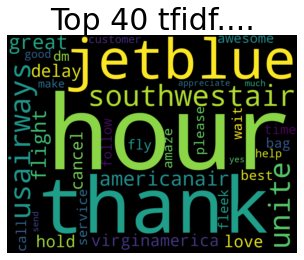

In [ ]:

all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 tfidf....', fontsize=30)
plt.axis("off")
plt.show()

### **Summary**:

- I have followed the notebook provided. 
- The goals were to have precision > 75% and both models using countvectorizer and tfidf fullfill that requirement
- The goal was to **build a model for text-classification** and I did that.
- I have created the wordclouds as required. Jetblue is not one of the airlines but the name appears in the wordcloud. I think at this point it is not very fair without removing the names of the airlines and I will repeat the work after removing the names of the airlines from the tweets.
- I **pre-processed the data** using various techniques and libraries.
- I **created a Word Cloud plots** based on the column 'negatvereason' and 'posite' and 'negative' scores subdata for tweets 'text' column.
- The **pre-processed data is converted to numbers (vectorized)**, so that we can feed the data into the model. I used countvectorizer and tfidf 
- I trained the model (random forrest) and optimized the parameters, which **led to an increase the overall accuracy.**
- After building the classification model, I **predicted the results for the test data.**
- I have increased the **max_feature parameter** in the vectorizer tfidf and it did not help much. 
- One can apply **other model tuning and hyperparameter tuning techniques, as well as other pre-processing techniques** to increase the overall accuracy even further. I have a lot of other duties and I do not have time to do this all. 


## Repeating the add the names of airlnes in stopwords.

In [ ]:
customlist2 = ['jetblue','united','unitedairlines','southwest','southwestairlines','delta','usairway','americanair','virginamerica']

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.


stopwords2 = map(sum, zip(stopwords, customlist2))
   

In [ ]:
dat2=data2

In [ ]:
dat2

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

dat2['text'] = dat2['text'].apply(lambda x: strip_html(x))

In [ ]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

dat2['text'] = dat2['text'].apply(lambda x: replace_contractions(x))

In [ ]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

dat2['text'] = dat2['text'].apply(lambda x: remove_numbers(x))

In [ ]:
dat2

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over minutes Late Flight...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [ ]:
dat2['text'] = dat2.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [ ]:

names = ['delta', 'deltaair', 'united', 'unitedair', 'southwest', 'southwestair', 'usairways',
         'virginamerica', 'american', 'americanair', 'jetblue', 'jetblues', 'usairway',
         'flight', 'airline', 'airlines']


def clean_stopword(d):
    stop_words = stopwords.words('english')
    for name in names:
        stop_words.append(name)
    return " ".join([w.lower() for w in d.split() if w.lower() not in stop_words and len(w) > 1])


In [ ]:
def remove_stopwords2(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in names:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def normalize2(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words=remove_stopwords(words)
    words =remove_stopwords2(words)
    words = lemmatize_list(words)
    return ' '.join(words)

dat2['text'] = dat2.apply(lambda row: normalize2(row['text']), axis=1)

In [ ]:
dat2

,airline_sentiment,text
0,neutral,dhepburn say
1,positive,plus add commercials experience tacky
2,neutral,not today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainmen...
4,negative,really big bad thing
...,...,...
14635,positive,thank get different chicago
14636,negative,leave minutes late warn communication minutes ...
14637,neutral,please bring blackberry
14638,negative,money change not answer phone suggestions make...


In [ ]:
dat2['text'] = dat2.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['text'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

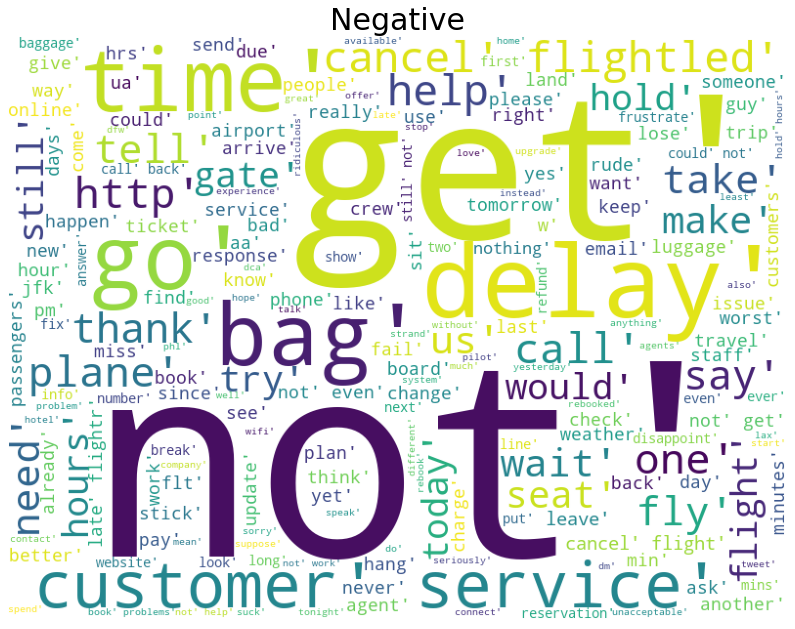

In [ ]:
show_wordcloud(dat2[dat2.airline_sentiment == 'negative'], title = "Negative")

The wordcloud for negative sentiment - after removing names of airlines - has the words customer service, delay, bag, time.

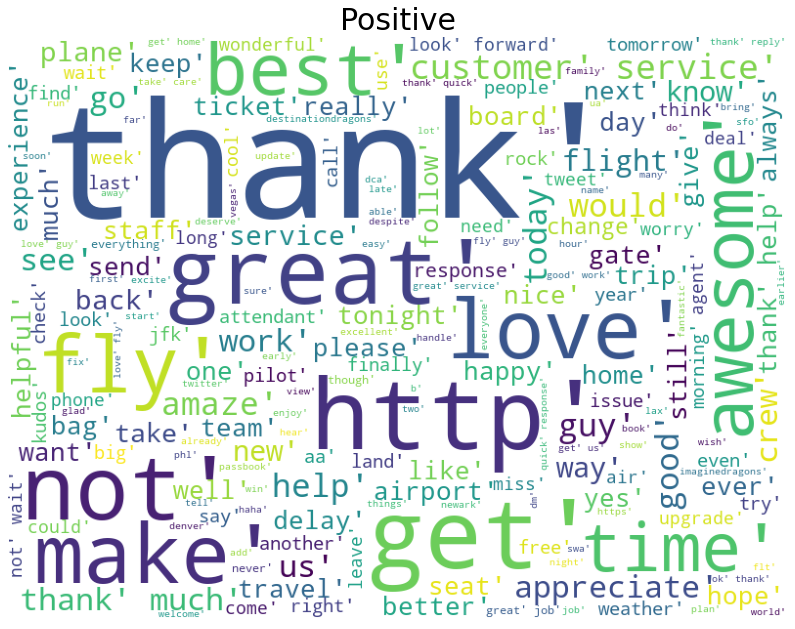

In [ ]:
show_wordcloud(dat2[dat2.airline_sentiment == 'positive'], title = "Positive")

The wordcloud for positive sentiment has the words thank best awesome love great. 

In [ ]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
data_features = vectorizer.fit_transform(dat2['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 3000)

In [ ]:
dat2

,airline_sentiment,text
0,neutral,"[dhepburn, say]"
1,positive,"[plus, add, commercials, experience, tacky]"
2,neutral,"[not, today, must, mean, need, take, another, ..."
3,negative,"[really, aggressive, blast, obnoxious, enterta..."
4,negative,"[really, big, bad, thing]"
...,...,...
14635,positive,"[thank, get, different, chicago]"
14636,negative,"[leave, minutes, late, warn, communication, mi..."
14637,neutral,"[please, bring, blackberry]"
14638,negative,"[money, change, not, answer, phone, suggestion..."


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [ ]:
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7558060109289617


In [ ]:
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

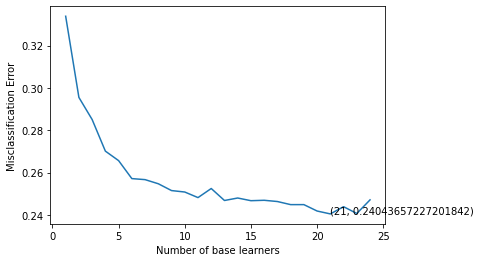

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7782331511839709

The score improved after removing the names of airlines

In [ ]:
result = clf.predict(X_test)

[[2577  184   53]
 [ 377  441   66]
 [ 209   85  400]]
0.7782331511839709


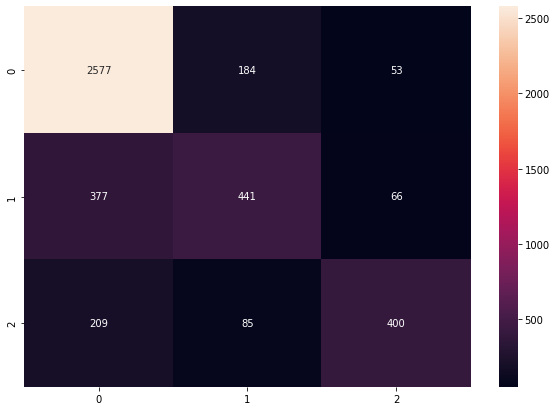

In [ ]:
result =  clf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


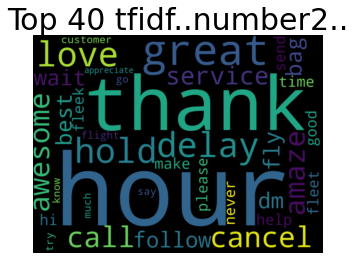

In [ ]:
all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 tfidf..number2..', fontsize=30)
plt.axis("off")
plt.show()

This time the wordcloud has cancel, dela hour awasome love thank hold as the crucial words. 